In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [30]:
df = pd.read_csv("Medical Appointment No Shows Dataset.csv")


In [31]:
df.shape

(110527, 14)

In [32]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [34]:
df['No-show'].value_counts()


No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [35]:
df['No-show'].value_counts(normalize=True) * 100


No-show
No     79.806744
Yes    20.193256
Name: proportion, dtype: float64

In [36]:
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [37]:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [38]:
df.duplicated().sum()


np.int64(0)

In [39]:
#Data Cleaning & Feature Engineering
df_clean = df.copy()


In [40]:
df_clean['Age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [41]:
df_clean = df_clean[df_clean['Age'] >= 0]


In [42]:
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])


In [43]:
df_clean['WaitingDays'] = (
    df_clean['AppointmentDay'] - df_clean['ScheduledDay']
).dt.days


In [44]:
df_clean = df_clean[df_clean['WaitingDays'] >= 0]


In [45]:
df_clean['No-show'] = df_clean['No-show'].map({'No': 0, 'Yes': 1})


In [46]:
df_clean.drop(
    ['PatientId', 'AppointmentID'],
    axis=1,
    inplace=True
)


In [47]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          71959 non-null  object             
 1   ScheduledDay    71959 non-null  datetime64[ns, UTC]
 2   AppointmentDay  71959 non-null  datetime64[ns, UTC]
 3   Age             71959 non-null  int64              
 4   Neighbourhood   71959 non-null  object             
 5   Scholarship     71959 non-null  int64              
 6   Hipertension    71959 non-null  int64              
 7   Diabetes        71959 non-null  int64              
 8   Alcoholism      71959 non-null  int64              
 9   Handcap         71959 non-null  int64              
 10  SMS_received    71959 non-null  int64              
 11  No-show         71959 non-null  int64              
 12  WaitingDays     71959 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(9)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [48]:
df_clean['No-show'].value_counts()


No-show
0    51437
1    20522
Name: count, dtype: int64

In [49]:
#Exploratory Data Analysis
df_clean['No-show'].value_counts(normalize=True) * 100


No-show
0    71.480982
1    28.519018
Name: proportion, dtype: float64

In [50]:
pd.crosstab(
    df_clean['SMS_received'],
    df_clean['No-show'],
    normalize='index'
) * 100


No-show,0,1
SMS_received,,
0,70.562272,29.437728
1,72.425455,27.574545


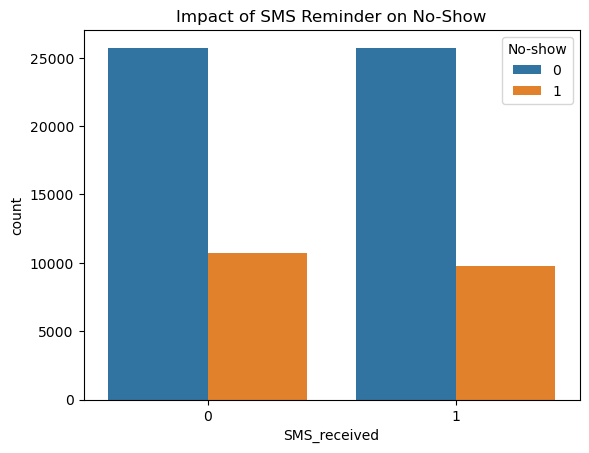

In [51]:
sns.countplot(x='SMS_received', hue='No-show', data=df_clean)
plt.title("Impact of SMS Reminder on No-Show")
plt.show()


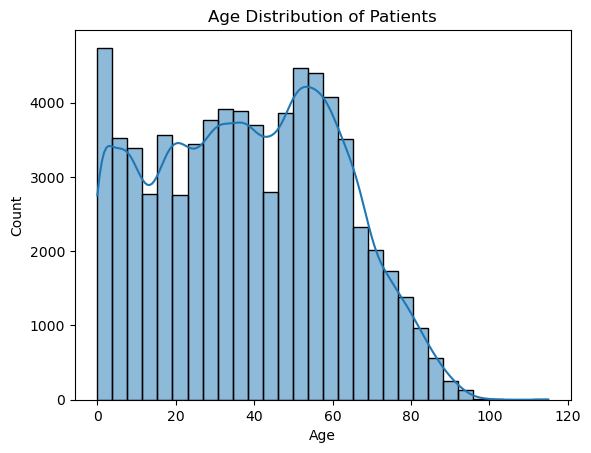

In [52]:
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()


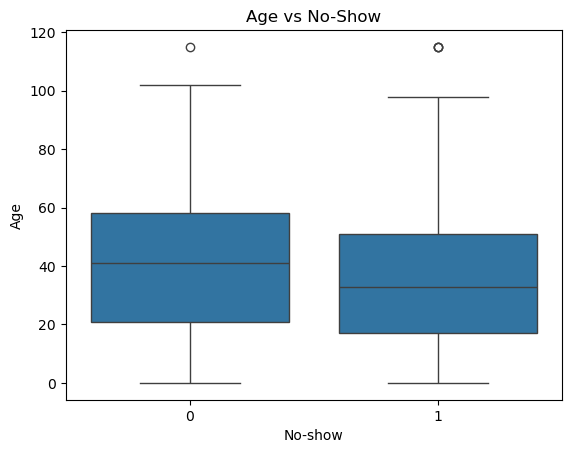

In [53]:
sns.boxplot(x='No-show', y='Age', data=df_clean)
plt.title("Age vs No-Show")
plt.show()


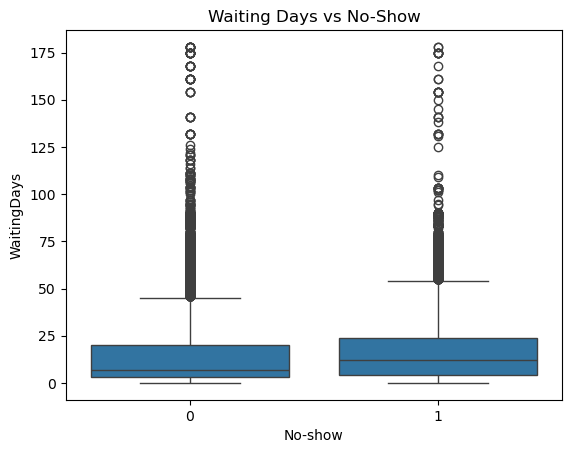

In [54]:
sns.boxplot(x='No-show', y='WaitingDays', data=df_clean)
plt.title("Waiting Days vs No-Show")
plt.show()


In [55]:
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])
df_clean['AppointmentWeekday'] = df_clean['AppointmentDay'].dt.day_name()


In [56]:
df_clean[['AppointmentDay', 'AppointmentWeekday']].head()


,AppointmentDay,AppointmentWeekday
5,2016-04-29 00:00:00+00:00,Friday
6,2016-04-29 00:00:00+00:00,Friday
7,2016-04-29 00:00:00+00:00,Friday
9,2016-04-29 00:00:00+00:00,Friday
10,2016-04-29 00:00:00+00:00,Friday


In [57]:
weekday_noshow = pd.crosstab(
    df_clean['AppointmentWeekday'],
    df_clean['No-show'],
    normalize='index'
) * 100

weekday_noshow


No-show,0,1
AppointmentWeekday,,
Friday,70.645574,29.354426
Monday,69.789452,30.210548
Saturday,70.967742,29.032258
Thursday,72.732892,27.267108
Tuesday,71.333981,28.666019
Wednesday,72.852617,27.147383


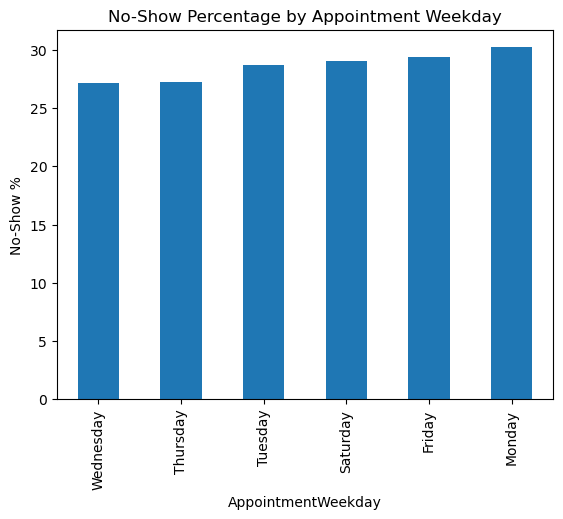

In [58]:
weekday_noshow[1].sort_values().plot(kind='bar')
plt.title("No-Show Percentage by Appointment Weekday")
plt.ylabel("No-Show %")
plt.show()


In [59]:
conditions = ['Hipertension', 'Diabetes', 'Alcoholism']

for col in conditions:
    print(col)
    print(pd.crosstab(df_clean[col], df_clean['No-show'], normalize='index') * 100)
    print()


Hipertension
No-show               0          1
Hipertension                      
0             70.161786  29.838214
1             76.476849  23.523151

Diabetes
No-show           0          1
Diabetes                      
0         71.193416  28.806584
1         75.041845  24.958155

Alcoholism
No-show             0          1
Alcoholism                      
0           71.625533  28.374467
1           65.916575  34.083425



In [60]:
#Feature Encoding & Model Preparation
X = df_clean.drop('No-show', axis=1)
y = df_clean['No-show']


In [61]:
X.select_dtypes(include=['object']).columns


Index(['Gender', 'Neighbourhood', 'AppointmentWeekday'], dtype='object')

In [62]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [64]:
X_train.shape, X_test.shape


((57567, 95), (14392, 95))

In [82]:
#Decision Tree Model Building & Training
from sklearn.tree import DecisionTreeClassifier



In [83]:
X = df_clean.drop(
    ['No-show', 'ScheduledDay', 'AppointmentDay'],
    axis=1
)


In [87]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)


In [88]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [90]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [91]:
#Model Evaluation & Performance Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [92]:
y_pred = dt_model.predict(X_test)


In [93]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7126181211784325

In [94]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[10176,   112],
       [ 4024,    80]])

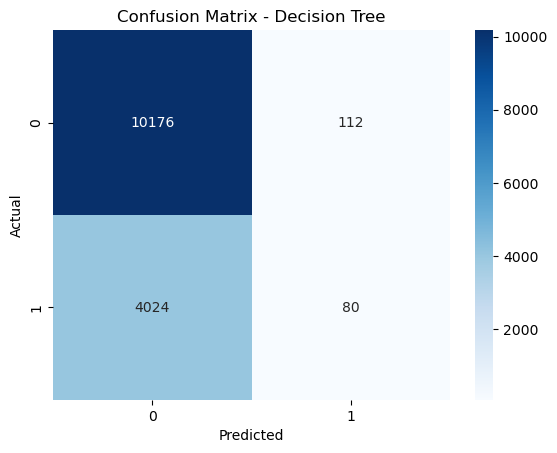

In [95]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [96]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10288
           1       0.42      0.02      0.04      4104

    accuracy                           0.71     14392
   macro avg       0.57      0.50      0.43     14392
weighted avg       0.63      0.71      0.60     14392



In [97]:
#Feature Importance & Model Insights
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
0,Age,0.483854
7,WaitingDays,0.271685
6,SMS_received,0.104073
35,Neighbourhood_GURIGICA,0.036420
1,Scholarship,0.020852
17,Neighbourhood_CARATOÍRA,0.017921
48,Neighbourhood_JESUS DE NAZARETH,0.014899
44,Neighbourhood_ITARARÉ,0.014382
88,AppointmentWeekday_Monday,0.009233
26,Neighbourhood_DO MOSCOSO,0.008765


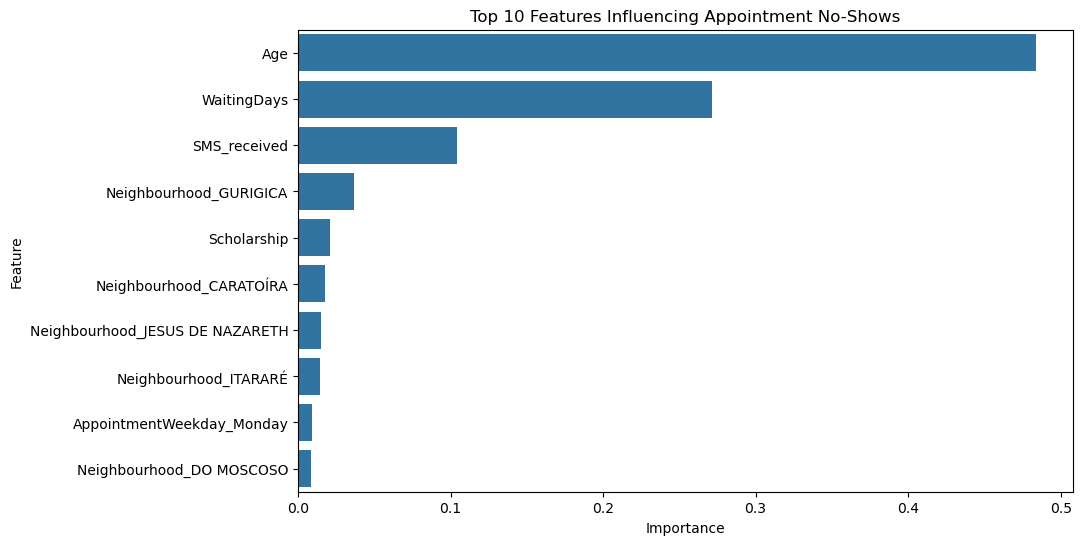

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Features Influencing Appointment No-Shows")
plt.show()
